In [25]:
import numpy as np
import matplotlib.pyplot as plt
from Helper import *


In [26]:
#GRAPHS#
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [27]:
# constants

males = [0, 4, 5 , 6, 7, 12, 14, 15]
females = [1, 2, 3, 8, 9, 10, 11, 13]

armLength = [28, 23.5, 27, 27, 28, 27, 28, 26, 23, 26, 24, 26, 27, 24, 0, 29]
vrLength = [4.94, 3.90, 2.49, 3.39, 5.27, 5.09, 7.19, 4.14, 6.20, 3.00, 4.21, 4.90, 5.45, 2.87, 6.95, 2.70]

playersBaseline = [4, 9, 13, 16, 19, 24, 28, 31, 36, 39, 43, 48, 51, 56, 60, 63]
playersOptimal  = [3, 8, 12, 15, 20, 23, 27, 32, 35, 40, 44, 47, 52, 55, 59, 64]

pathPhase2 = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\perceivedEffortNasa.csv"

In [28]:
def readPerceivedEffortPhase2(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    count = 0
    for x in f:
        if(count > 0):
            line = x.split(',')
            player = int(line[1])
            results[player] = []
            for i in range(2, 9):
                results[player].append(int(line[i]))
        count += 1
    f.close()
    return results

def getResultsForPlayers(results, players):
    resultsPlayers = []
    for p in players: 
        resultsPlayers.append(results[p])
    return np.array(resultsPlayers)   


In [29]:
resultsPhase2 = readPerceivedEffortPhase2(pathPhase2)
resultsPhase2Baseline = getResultsForPlayers(resultsPhase2, playersBaseline)
resultsPhase2Optimal = getResultsForPlayers(resultsPhase2, playersOptimal)    

(16, 7)


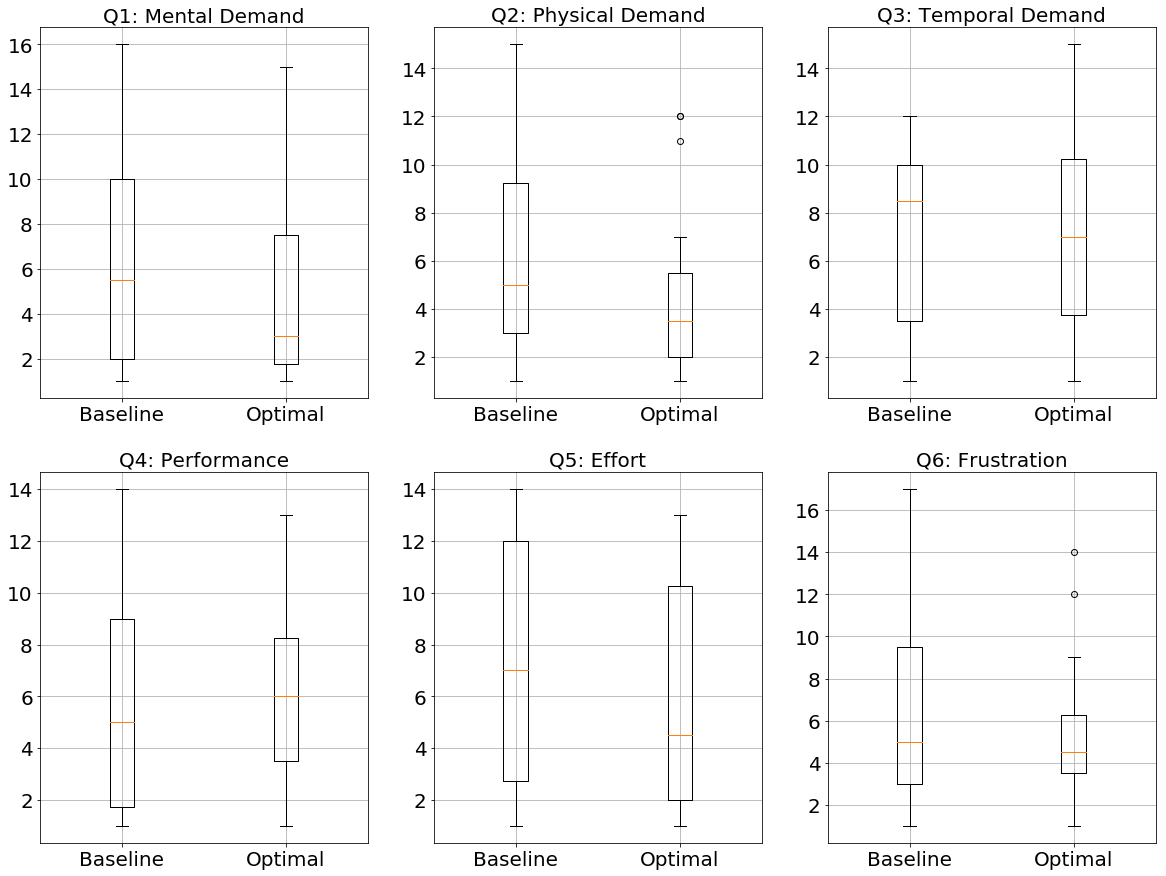

Baseline 1perfect - 21 fail [ 2  3  1  6  4 11  9  9  1 10  4  1  1  8 14  6]
Optimal  1perfect - 21 fail [ 2  4  2  6  7  9  8 13  5 11  6  1  1  6 13  6]


In [30]:
# boxPlots per Question
questions = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"]
idx = 0  
idy = 0
print(np.shape(resultsPhase2Baseline))
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20,15))
#fig.suptitle("NASA TLX", y = 0.95)
for i in range (1, 7):
    base = resultsPhase2Baseline[:,i]
    optimal = resultsPhase2Optimal[:,i]
    axs[idx][idy].boxplot([ base, optimal], labels= ["Baseline", "Optimal"])
    axs[idx][idy].set_title('Q'+str(i) + ": " + questions[i-1])
    axs[idx][idy].grid(True)
    idy += 1
    if (idy == 3):
        idy = 0
        idx +=1

plt.savefig("NASATLX",bbox_inches='tight', dpi=150) 
plt.show()

print("Baseline 1perfect - 21 fail" , resultsPhase2Baseline[:,4])
print("Optimal  1perfect - 21 fail" ,resultsPhase2Optimal[:,4])

In [35]:
from scipy.stats import pearsonr, spearmanr, kendalltau, wilcoxon, chisquare, normaltest
from scipy.stats.distributions import chi2

def stats(data, lable):
    median = np.median(data)
    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)
    iqr = upper_quartile - lower_quartile
    print(lable, "{:.2f} & {:.2f}".format(median, iqr))

def isNormal(x):
    k2, p = normaltest(x)
    alpha = 1e-3
    #print("p = {:g}".format(p))
    p = 3.27207e-11
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        #rint("The null hypothesis can be rejected")
        return False
    else:
       #print("The null hypothesis cannot be rejected")
        return True

# check for correlations
def findCorelation(data1, data2, label=""):
    print(label)
    t, p = wilcoxon(data1, data2, "pratt")  
    #print(isNormal(data1), isNormal(data2)) - not uniformly distributed 
    print('Paired wilcoxon   t-value, p-value: %.1f & ' % t, p)
    
    stats(data1, label  + " B")
    stats(data2, label  + " O")
    
    print(" ")
    
    
    


# findCorelation(vrLength, resultsPhase2Optimal[:, 1], " Length multiplier /  Q1: ") #nop 
# findCorelation(vrLength, resultsPhase2Optimal[:, 2], " Length multiplier /  Q2: ") #nop  
# findCorelation(vrLength, resultsPhase2Optimal[:, 3], " Length multiplier /  Q3: ") #nop  
# findCorelation(vrLength, resultsPhase2Optimal[:, 4], " Length multiplier /  Q4: ") #nop  
# findCorelation(vrLength, resultsPhase2Optimal[:, 5], " Length multiplier /  Q5: ") #nop  
# findCorelation(vrLength, resultsPhase2Optimal[:, 6], " Length multiplier /  Q6: ") #nop  

# idk if these are relevant at all - but there are corelated :) 
findCorelation(resultsPhase2Baseline[:, 1], resultsPhase2Optimal[:, 1], "  Q1: " + questions[0] )  #yes Kendall
findCorelation(resultsPhase2Baseline[:, 2], resultsPhase2Optimal[:, 2], "  Q2: " + questions[1] )  #yes Kendall
findCorelation(resultsPhase2Baseline[:, 3], resultsPhase2Optimal[:, 3], "  Q3: " + questions[2] )  #yes Kendall
findCorelation(resultsPhase2Baseline[:, 4], resultsPhase2Optimal[:, 4], "  Q4: " + questions[3] )  #yes Kendall
findCorelation(resultsPhase2Baseline[:, 5], resultsPhase2Optimal[:, 5], "  Q5: " + questions[4] )  #yes Kendall
findCorelation(resultsPhase2Baseline[:, 6], resultsPhase2Optimal[:, 6], "  Q6: " + questions[5] )  #yes Kendall


  Q1: Mental Demand
Paired wilcoxon   t-value, p-value: 24.5 &  0.024348181257180038
  Q1: Mental Demand B 5.50 & 8.00
  Q1: Mental Demand O 3.00 & 5.75
 
  Q2: Physical Demand
Paired wilcoxon   t-value, p-value: 29.5 &  0.0452272497879937
  Q2: Physical Demand B 5.00 & 6.25
  Q2: Physical Demand O 3.50 & 3.50
 
  Q3: Temporal Demand
Paired wilcoxon   t-value, p-value: 45.5 &  0.24011855897136103
  Q3: Temporal Demand B 8.50 & 6.50
  Q3: Temporal Demand O 7.00 & 6.50
 
  Q4: Performance
Paired wilcoxon   t-value, p-value: 40.0 &  0.1459650145809028
  Q4: Performance B 5.00 & 7.25
  Q4: Performance O 6.00 & 4.75
 
  Q5: Effort
Paired wilcoxon   t-value, p-value: 37.0 &  0.10852675993684543
  Q5: Effort B 7.00 & 9.25
  Q5: Effort O 4.50 & 8.25
 
  Q6: Frustration
Paired wilcoxon   t-value, p-value: 44.5 &  0.22095855176639845
  Q6: Frustration B 5.00 & 6.50
  Q6: Frustration O 4.50 & 2.75
 
